# Business Problem

- City Hotels and Resort Hotels have seen high cancellation rates and also facing number of other issues resulting in less revenue and less utilization of hotel rooms.
- Our goal is to increase their efficiency in generating revenue by lowering the cancellation rates in both types of hotels and finding solutions for other issues as well.

## Assumptions:

- No unusual occurances between 2015 and 2017 will have a substantial impact on the data used.
- The information is still current and can be used to analyze a hotels possible plans in an efficient manner.
- Cancellations result in vacant rooms for the booked length of time.
- Cancellations and reservations are made in same year.

## Research Question:

1. What are the variables affecting the hotel reservation cancellations?
2. How can we reduce reservations cancellations?
3. which promotions help to improve revenue of hotels ?

## Hypothesis:

1. More cancellations occure when prices are higher.
2. When thers is a long waiting list , customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations

### Importing Libraries

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [166]:
df=pd.read_csv('hotel_booking.csv')

### Exploratory Data Analysis and Data cleaning

In [167]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [168]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [169]:
df.shape

(119390, 36)

In [170]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [171]:
#  Dropping unnecessary columns
df=df.drop(['name','email','phone-number','credit_card'],axis=1)

In [172]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [173]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [175]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [176]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [177]:
# for col in df.columns[df.dtypes=='object']:
#     print(col)
#     print(df[col].unique())

### Data Wrangling

In [178]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [179]:
df.drop(['agent','company'],axis=1,inplace=True) # removing columns which have most null values.
# Analysing on these columns is impossible

In [180]:
df.dropna(inplace=True)# dropping rows having null values

In [181]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [182]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [183]:
df=df[df['adr']<5000]

### Data Analysis and visualizations

In [184]:
df['is_canceled'].value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


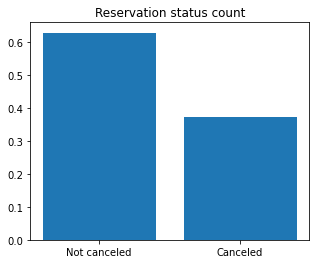

In [185]:
cancellation_percentage=df['is_canceled'].value_counts(normalize=True) # returns percentage
print(cancellation_percentage)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],cancellation_percentage)
plt.show()

- From the plot we can see that, there are significant number of reservations that have not been cancelled.
- But still 37% of clients have cancelled their reservations, which has a significant impact on hotels earnings

Cancellations Status of city and resort hotels

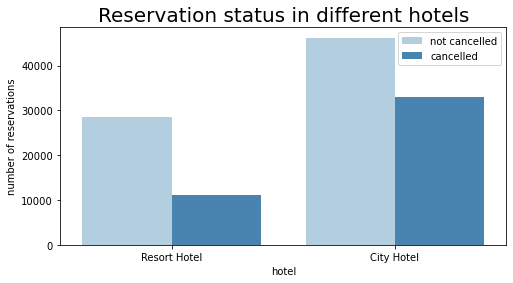

In [186]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')

plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','cancelled'])
plt.show()

- In comparision to resort hotels, city hotels have more bookings.
- The reason could be resort hotels are more expensive than those in cities

In [187]:
df.groupby('hotel')['is_canceled'].value_counts(normalize=True)

hotel         is_canceled
City Hotel    0              0.582918
              1              0.417082
Resort Hotel  0              0.720250
              1              0.279750
Name: is_canceled, dtype: float64

Compare Average Daily rate of city and resort hotels

In [188]:
#adr-> average daily rate
resort_adr=df[df['hotel']=='Resort Hotel'].groupby('reservation_status_date')[['adr']].mean()
city_adr=df[df['hotel']=='City Hotel'].groupby('reservation_status_date')[['adr']].mean()

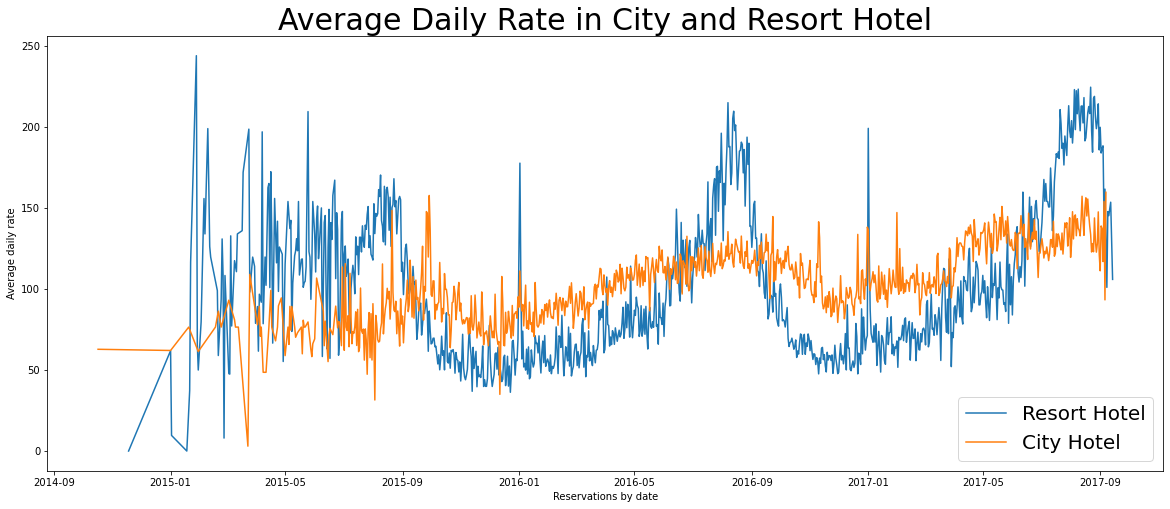

In [189]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_adr.index,resort_adr['adr'],label='Resort Hotel')
plt.plot(city_adr.index,city_adr['adr'],label='City Hotel')
plt.xlabel('Reservations by date')
plt.legend(fontsize=20)
plt.ylabel('Average daily rate')
plt.show()

- From the plot we can see that there is some uniformity between 2016 to 2017
- Also when we observe we can see that there are spikes due to high price during weekends or special days.
- Average Daily rate for city hotel is less than that of resort hotels.
- Price of resort hotels are higher during special days and weekends

Lets Analyze the period having most reservations and most cancellations

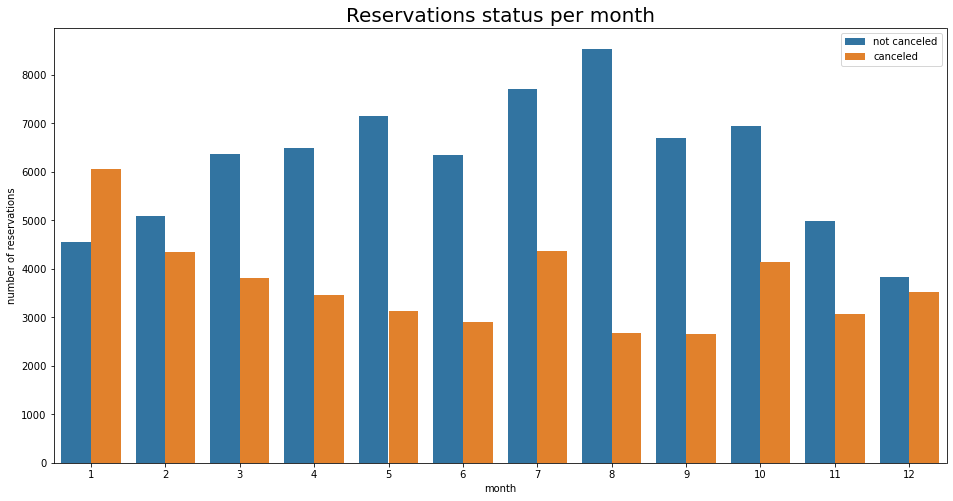

In [190]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax=sns.countplot(x='month',hue='is_canceled',data=df)
plt.title('Reservations status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

- Most cancellations are made in January and least cancellations in August and September
- Most Reservations are made in August and least reservations in December

Lets plot Adr and analyze more on Reservations and cancellations

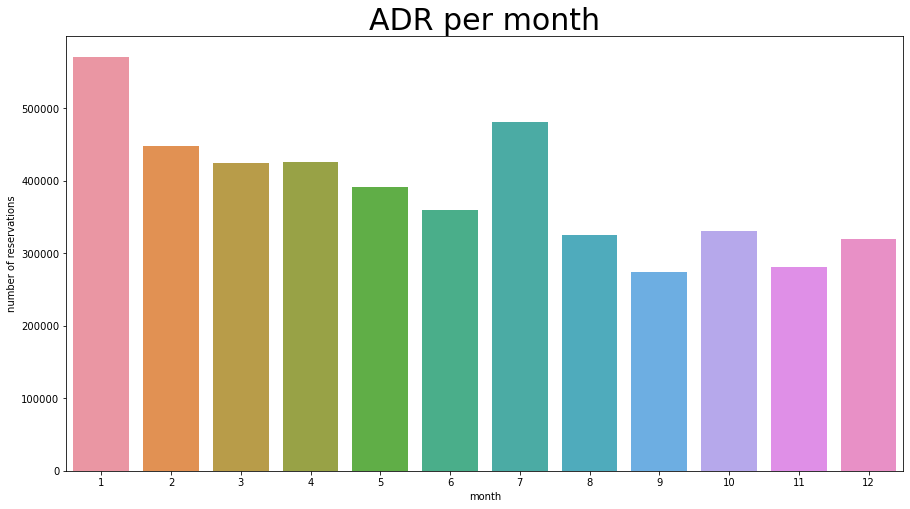

In [191]:
plt.figure(figsize=(15,8))
ax=sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.title('ADR per month',size=30)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.show()

- We can see that averge price is highest in january and shows the reason for highest cancellations.
- The prices are least in september and may be reason for least cancellations
- But prices may not be only factor affecting the cancellations.

Analyzing cancellations in top 10 countries 

In [192]:
cancelled_data=df[df['is_canceled']==1]
cancelation_in_countries=cancelled_data['country'].value_counts()[:10]

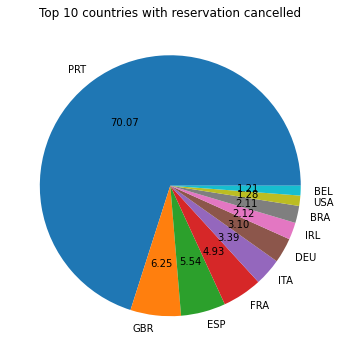

In [193]:
plt.figure(figsize=(6,6))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(cancelation_in_countries,autopct='%.2f',labels=cancelation_in_countries.index)
plt.show()

- Portugal countries have most cancellations so hotels in these countries have to concentrate more on prices and quality in order to reduce the number of cancellations.

In [194]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

Most reservations are made more from online Travel agents than offline travel agents which contradicts our hypothesis.


Lets Analyze the cancellations based on these

In [195]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

- The Reservations made and cancelled are highest from online TA
- May be quality shown in online ad was not maintained or 
expectations didnt match the actual quality.

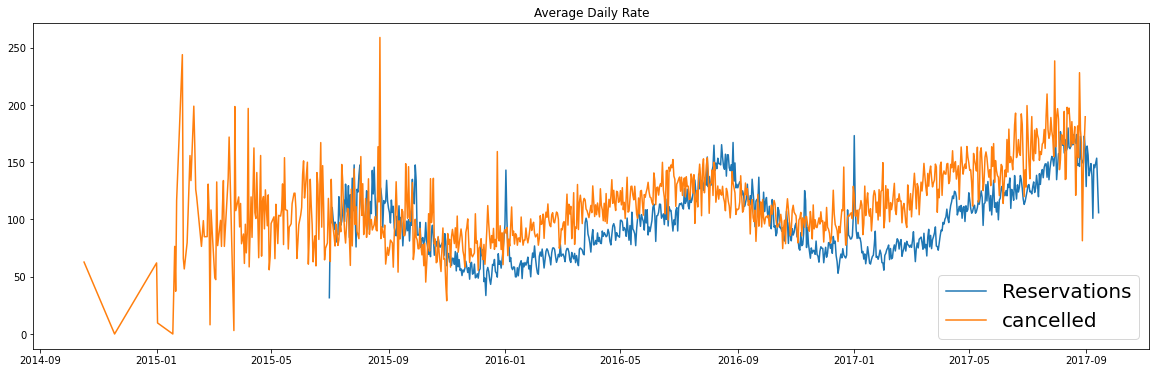

In [199]:
cancelled_df_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

reservation_data=df[df['is_canceled']==0]
reservation_adr=reservation_data.groupby('reservation_status_date')[['adr']].mean()
reservation_adr.reset_index(inplace=True)
reservation_adr.sort_values('reservation_status_date',inplace=True)


plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(reservation_adr['reservation_status_date'],reservation_adr['adr'],label='Reservations')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend(fontsize=20)

- The data seems to be incomplete before 2016.
- so lets consider data between 2016 and 2017 and plot it to understand.

In [200]:
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')&(cancelled_df_adr['reservation_status_date']<'2017')]
reservation_adr=reservation_adr[(reservation_adr['reservation_status_date']>'2016')&(reservation_adr['reservation_status_date']<'2017')]

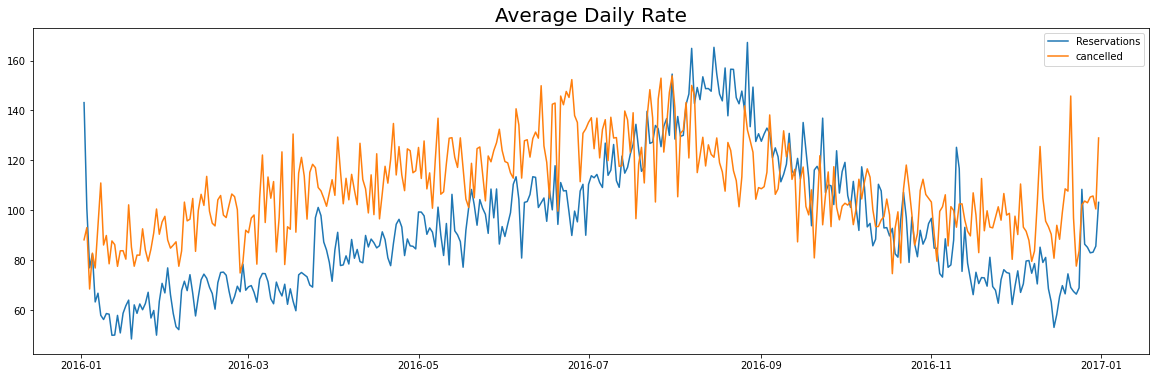

In [206]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=20)
plt.plot(reservation_adr['reservation_status_date'],reservation_adr['adr'],label='Reservations')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend();

- we can see that ADR for reserved dates is less when compared to cancelled days. So from the plot we can see that ADR pays major role for cancellations.

## Suggestions:

1. Cancellation rates rise as the price rises. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.
2. As the ratio of cancellations and reservations is higher in resort hotel than city hotels, resort hotels should reduce their prices.
3. Hotels can provide some discounts in Janulary to increase their revenue in that month.
4. Increasing quality and services can reduce the cancellation rates.